In [1]:
#importing pandas
import pandas as pd

Story: Mr. Jim is a successful cafe owner(Starbucks) in North America. He is willing to expand his business to other parts of the world, but for that he hires data scientists(we assume us) to provide him effective insights on where the cafe business is going to flourish more. We are assigned to provide the result to the CEO, the manager and the entire team. We first try to use the visualization for the CEO. For this purpose we use the zomato dataset that is available on kaggle. 

In [2]:
#loading the zomato dataset into pandas dataframe. 
df = pd.read_csv('zomato.csv', encoding = "ISO-8859-1")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
#checking the  number of rows and columns in the dataframe. 
df.shape

(9551, 21)

In [4]:
#we see the pattern for some significant numeric values. 
df[['Average Cost for two', 'Price range', 'Aggregate rating', 'Votes']].describe().T

,count,mean,std,min,25%,50%,75%,max
Average Cost for two,9551.0,1199.210763,16121.183073,0.0,250.0,400.0,700.0,800000.0
Price range,9551.0,1.804837,0.905609,1.0,1.0,2.0,2.0,4.0
Aggregate rating,9551.0,2.666370,1.516378,0.0,2.5,3.2,3.7,4.9
Votes,9551.0,156.909748,430.169145,0.0,5.0,31.0,131.0,10934.0


In [5]:
#we try to see if there are any null values in the columns and the type of data in the column of the dataset. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [6]:
#Since, we are using the no. of votes to assume the maximum visited restaurant, we see if any rows has the number of votes equal to zero. 
df[df['Votes'] == 0]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
69,6710645,Cantinho da Gula,30,Sí£o Paulo,"Rua Pedroso Alvarenga, 522, Itaim Bibi, Sí£o P...",Itaim Bibi,"Itaim Bibi, Sí£o Paulo",-46.675667,-23.581000,Brazilian,...,Brazilian Real(R$),No,No,No,No,2,0.0,White,Not rated,0
874,18433852,The Chaiwalas,1,Faridabad,"Sector 21 A, Asian Hospital, Badhkal Chowk, Ba...",Badkal Lake,"Badkal Lake, Faridabad",77.300088,28.426284,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
879,18465871,Fusion Food Corner,1,Faridabad,"158/7, Opposite DDA Flat, Pul Pehlad Pur, Char...",Charmwood Village,"Charmwood Village, Faridabad",0.000000,0.000000,"North Indian, Chinese",...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
880,18472646,Punjabi Rasoi,1,Faridabad,"1, Deepak Complex, Eros Charmwood Village, Far...",Charmwood Village,"Charmwood Village, Faridabad",77.292431,28.492325,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
887,18471268,Baskin Robbin,1,Faridabad,"Ground Floor, Crown Interiorz Mall, Sector 35,...","Crown Interiorz Mall, Sector 35, Faridabad","Crown Interiorz Mall, Sector 35, Faridabad, Fa...",77.307448,28.469594,Desserts,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
900,308961,Angaar,1,Faridabad,"Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...","Hotel Saffron Kiran, Faridabad","Hotel Saffron Kiran, Faridabad, Faridabad",77.305698,28.471985,"North Indian, Chinese",...,Indian Rupees(Rs.),Yes,No,No,No,3,0.0,White,Not rated,0
901,308963,TcozY,1,Faridabad,"Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...","Hotel Saffron Kiran, Faridabad","Hotel Saffron Kiran, Faridabad, Faridabad",77.306640,28.472209,Cafe,...,Indian Rupees(Rs.),No,No,No,No,3,0.0,White,Not rated,0
902,308962,The Retriever,1,Faridabad,"Hotel Saffron Kiran, 12/6, Adjacent to Badarpu...","Hotel Saffron Kiran, Faridabad","Hotel Saffron Kiran, Faridabad, Faridabad",77.306251,28.472343,"North Indian, Mughlai, Chinese",...,Indian Rupees(Rs.),Yes,No,No,No,3,0.0,White,Not rated,0
905,18472429,Chill 'N Grill,1,Faridabad,"3C-188, Opposite Bharat Optical, NIT, Faridabad",NIT,"NIT, Faridabad",77.290067,28.395446,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
906,18472418,Punjabi Restaurant,1,Faridabad,"3F/49, Sainik Colony Road, NIT, Faridabad",NIT,"NIT, Faridabad",77.287481,28.393951,"North Indian, Mughlai",...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,0


In [7]:
#We select only those which were voted.
df = df[df['Votes'] > 0]

In [8]:
df[df['Votes'] < 10].shape

(1994, 21)

In [9]:
#We see the number of columns in the dataframe. 
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

The story behind the visualization is Mr. Jim wants to establish his Starbucks in the city with less number of restaurants and cafe shop.

In [10]:
#We see the unique values in the city column.
df['City'].unique()

array(['Makati City', 'Mandaluyong City', 'Pasay City', 'Pasig City',
       'Quezon City', 'San Juan City', 'Santa Rosa', 'Tagaytay City',
       'Taguig City', 'Brasí_lia', 'Rio de Janeiro', 'Sí£o Paulo',
       'Albany', 'Armidale', 'Athens', 'Augusta', 'Balingup',
       'Beechworth', 'Boise', 'Cedar Rapids/Iowa City', 'Chatham-Kent',
       'Clatskanie', 'Cochrane', 'Columbus', 'Consort', 'Dalton',
       'Davenport', 'Des Moines', 'Dicky Beach', 'Dubuque',
       'East Ballina', 'Fernley', 'Flaxton', 'Forrest', 'Gainesville',
       'Hepburn Springs', 'Huskisson', 'Inverloch', 'Lakes Entrance',
       'Lakeview', 'Lincoln', 'Lorn', 'Macedon', 'Macon', 'Mayfield',
       'Mc Millan', 'Middleton Beach', 'Miller', 'Monroe', 'Montville',
       'Ojo Caliente', 'Orlando', 'Palm Cove', 'Paynesville', 'Penola',
       'Pensacola', 'Phillip Island', 'Pocatello', 'Potrero', 'Princeton',
       'Rest of Hawaii', 'Savannah', 'Singapore', 'Sioux City',
       'Tampa Bay', 'Tanunda', 'Trentha

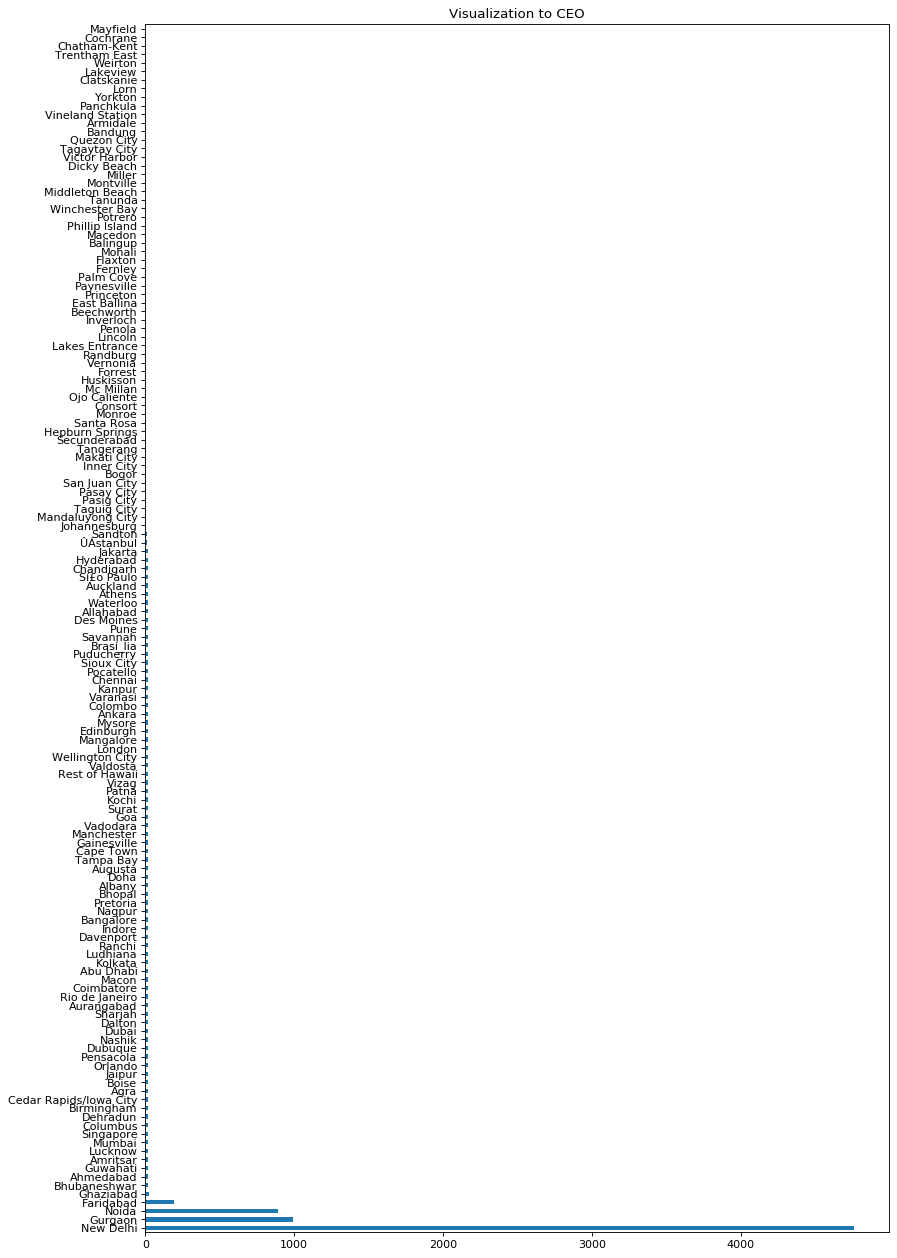

In [25]:
#We see the number of restaurants in the city given in the dataset. 
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(12, 20), dpi= 80, facecolor='w', edgecolor='k')
df['City'].value_counts().plot(kind = 'barh', title = 'Visualization to CEO')

Visualization to CEO: As we can see in the above plot, the cities in Delhi have a large number of restaurants and it may not be useful to have a cafe in these cities. In order to avoid competition, we can see that there are cities where the number of restaurants is very less. So, we propose Mr. CEO to establish his Starbucks franchise in such cities. 

In [13]:
#We see the data of the city which lies in between and find out there are about 20 restaurants. So, the suggestion is restricted to those parts where there are less number of restaurants. 
df[df['City'] == 'Dalton']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
209,17334434,Thatcher's Barbeque and Grill,216,Dalton,"1214 N Wall St, Calhoun, GA 30701",Calhoun,"Calhoun, Dalton",-84.939693,34.525133,"American, BBQ, Southern",...,Dollar($),No,No,No,No,2,3.7,Yellow,Good,38
210,17334348,Christian and Jake's Bistro,216,Dalton,"555 Georgia Hwy 53, Calhoun, GA 30701",Calhoun,"Calhoun, Dalton",-84.926258,34.474635,"Desserts, Sandwich",...,Dollar($),No,No,No,No,1,4.4,Green,Very Good,122
211,17334213,Dub's High on the Hog,216,Dalton,"349 S Wall St, Calhoun, GA 30701",Calhoun,"Calhoun, Dalton",-84.952392,34.497249,BBQ,...,Dollar($),No,No,No,No,2,4.4,Green,Very Good,207
212,17334355,Sierra's Mexican Restaurant,216,Dalton,"500 S. 3rd Avenue, Chatsworth, GA 30705",Chatsworth,"Chatsworth, Dalton",-84.767911,34.752476,"Mexican, Tex-Mex",...,Dollar($),No,No,No,No,1,3.9,Yellow,Good,66
213,17334212,Oakwood Cafe,216,Dalton,"201 West Cuyler Street, Dalton, GA 30720",Dalton,"Dalton, Dalton",-84.969393,34.769686,"BBQ, Breakfast, Southern",...,Dollar($),No,No,No,No,1,4.9,Dark Green,Excellent,249
214,17333797,Chili's Grill & Bar,216,Dalton,"881 College Dr, Dalton, GA 30720",Dalton,"Dalton, Dalton",-85.003900,34.764300,American,...,Dollar($),No,No,No,No,2,3.8,Yellow,Good,63
215,17334217,Fuji Japanese Steakhouse,216,Dalton,"1321 W Walnut Ave, Dalton, GA 30720",Dalton,"Dalton, Dalton",-84.992342,34.759551,"Japanese, Sushi",...,Dollar($),No,No,No,No,3,3.8,Yellow,Good,145
216,17334273,Las Palmas,216,Dalton,"1331 W Walnut Ave, Dalton, GA 30720",Dalton,"Dalton, Dalton",-84.992924,34.759665,Mexican,...,Dollar($),No,No,No,No,1,3.8,Yellow,Good,83
217,17334254,Tony's Italian Restaurant & Pizza,216,Dalton,"933 Market St, Dalton, GA 30720",Dalton,"Dalton, Dalton",-84.999678,34.758645,Italian,...,Dollar($),No,No,No,No,2,3.7,Yellow,Good,116
218,17333836,Filling Station,216,Dalton,"316 N Hamilton St, Dalton, GA 30720",Dalton,"Dalton, Dalton",-84.967800,34.774200,"American, Burger",...,Dollar($),No,No,No,No,1,4.1,Green,Very Good,122


In [14]:
#We select the city where the number of restaurants are less than 5. As our better choice. 
city_counts = df['City'].value_counts()
city_list = city_counts[city_counts < 5].index.tolist()
cuisines = df[df['City'].isin(city_list)]
cuisines.head(50)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [15]:
#We see if there are any cafes already in these cities to filter our search. 
cuisines[cuisines['Cuisines'] == 'Cafe']

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
290,16612028,The Belle General,14,East Ballina,"12 Shelly Beach Rd, East Ballina, NSW",East Ballina,"East Ballina, East Ballina",153.593331,-28.862663,Cafe,...,Dollar($),No,No,No,No,2,4.1,Green,Very Good,56
322,17842104,Mr.,14,Macedon,"23 Victoria St, Macedon, VIC",Macedon,"Macedon, Macedon",144.564174,-37.423189,Cafe,...,Dollar($),No,No,No,No,2,3.5,Yellow,Good,31
9485,6502134,The Whippet,189,Randburg,"Corner of 7th Street and 4th Avenue, Linden, R...",Linden,"Linden, Randburg",27.991791,-26.140260,Cafe,...,Rand(R),No,No,No,No,3,4.3,Green,Very Good,618


In [16]:
#As a cross check we see the cafes in the most populous city in terms of restaurants i.e., New Delhi. 
df[(df['Cuisines'] == 'Cafe') & (df['City'] == 'New Delhi')]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2592,7582,Cafe Coffee Day,1,New Delhi,"Nilgiri Market, Opposite Nilgiri Appartments, ...",Alaknanda,"Alaknanda, New Delhi",77.250146,28.528133,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,23
2632,302152,Starbucks,1,New Delhi,"1st Floor, Ambience Mall, Vasant Kunj, New Delhi","Ambience Mall, Vasant Kunj","Ambience Mall, Vasant Kunj, New Delhi",77.155413,28.540897,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,3.7,Yellow,Good,256
2665,18377887,Chilll House Kafe,1,New Delhi,"F-201, A Block, Ashish Complex-2, Central Mark...",Anand Vihar,"Anand Vihar, New Delhi",77.306815,28.659437,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,0.0,White,Not rated,1
2754,18163907,Cafe Coffee Day,1,New Delhi,"Shop D, Ground Floor, DCM Building, Barakhamba...",Barakhamba Road,"Barakhamba Road, New Delhi",77.225462,28.629818,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4
2768,7354,Cafe Coffee Day,1,New Delhi,"14-A, Basant Lok Market, Vasant Vihar, New Delhi","Basant Lok Market, Vasant Vihar","Basant Lok Market, Vasant Vihar, New Delhi",77.164108,28.558603,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.2,Orange,Average,49
2796,301581,Coffee Shop - Centaur Hotel,1,New Delhi,"Centaur Hotel, Near Aerocity, New Delhi","Centaur Hotel, Aerocity","Centaur Hotel, Aerocity, New Delhi",77.115196,28.543091,Cafe,...,Indian Rupees(Rs.),No,No,No,No,3,0.0,White,Not rated,2
2802,18312487,Cafe Coffee Day,1,New Delhi,"1st Floor, BPCL Petrol Pump, Opposite Chanakya...",Chanakyapuri,"Chanakyapuri, New Delhi",77.190976,28.583433,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,3.0,Orange,Average,4
2809,312194,Costa Coffee,1,New Delhi,"Shantipath, Chanakyapuri, New Delhi",Chanakyapuri,"Chanakyapuri, New Delhi",77.168367,28.595299,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,3.0,Orange,Average,4
2953,18371396,Cafe Coffee Day,1,New Delhi,"K-1/14, Main Road, Chittaranjan Park, New Delhi",Chittaranjan Park,"Chittaranjan Park, New Delhi",77.253030,28.539373,Cafe,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1
2985,602,Cafe Coffee Day - The Lounge,1,New Delhi,"14, Community Centre, New Friends Colony, New ...","Community Centre, New Friends Colony","Community Centre, New Friends Colony, New Delhi",77.269034,28.562628,Cafe,...,Indian Rupees(Rs.),No,No,No,No,2,3.2,Orange,Average,42


In [18]:
#We select such places where there are no cafes. 
final_list = cuisines[cuisines['Cuisines'] != 'Cafe']
final_list.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


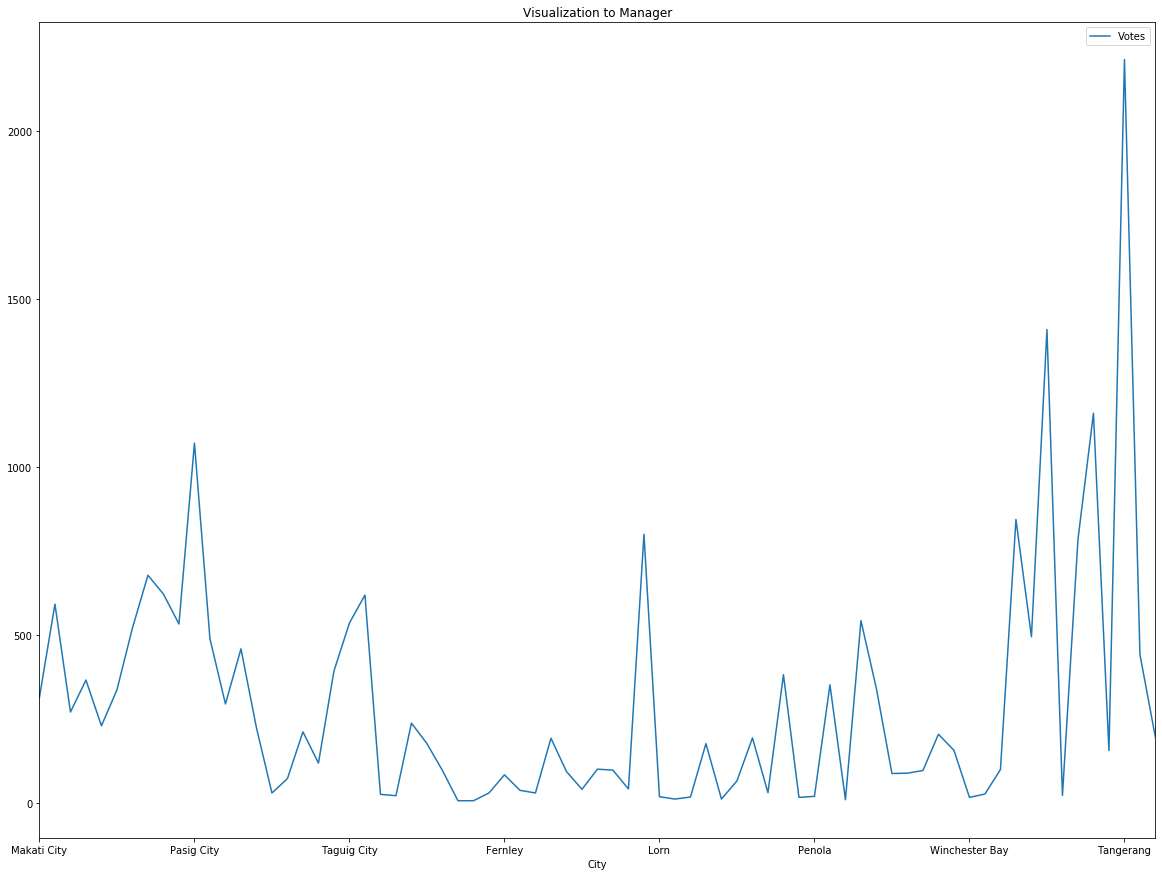

In [23]:
#Plot to manager. The manager tries to have the cafe in such places where there are maximum voters as they are more engaged. 
final_list.plot(x = 'City', y = 'Votes', figsize = (20,15), title = 'Visualization to Manager')

In [20]:
#We can see that the maximum voters are from Tangerang which lies in country code 94. So, we try to see at the data from the country with code 94. 
final_country = cuisines[cuisines['Country Code'] == 94]
final_country

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9277,7423620,Momo Milk,94,Bogor,"Jl. Kantor Pos No. 6, Bogor Timur, Bogor",Bogor Timur,"Bogor Timur, Bogor",106.810301,-6.606917,"Cafe, Desserts, Beverages",...,Indonesian Rupiah(IDR),No,No,No,No,2,3.7,Yellow,Good,783
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9295,18386856,Onokabe,94,Tangerang,"Alam Sutera Town Center, Jl. Alam Utama, Serpo...","Alam Sutera Town Center, Serpong Utara","Alam Sutera Town Center, Serpong Utara, Tangerang",106.652688,-6.241792,Indonesian,...,Indonesian Rupiah(IDR),No,No,No,No,3,3.7,Yellow,Good,155
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212


In [21]:
#We try to filter the dataframe to those places where the ratings are excellent or very good for team to concentrate on that part. 
visual_team = final_country[(final_country['Rating text'] == 'Excellent') | (final_country['Rating text'] == 'Very Good')]
visual_team

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9276,18400530,Noah's Barn Coffeenery,94,Bandung,"Jl. Dayang Sumbi No. 2, Dago, Bandung",Dago,"Dago, Bandung",107.612790,-6.887058,"Cafe, Coffee and Tea, Western",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.2,Green,Very Good,22
9278,7423482,Lemongrass,94,Bogor,"Jl. Raya Pajajaran No. 21, Bogor Utara, Bogor",Bogor Utara,"Bogor Utara, Bogor",106.807850,-6.576578,"Peranakan, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.0,Green,Very Good,1159
9296,7417450,Talaga Sampireun,94,Tangerang,"Jl. Boulevard Bintaro Jaya Blok B7/N1, Bintaro...",Pondok Aren,"Pondok Aren, Tangerang",106.726119,-6.269914,"Sunda, Indonesian",...,Indonesian Rupiah(IDR),No,No,No,No,3,4.9,Dark Green,Excellent,2212


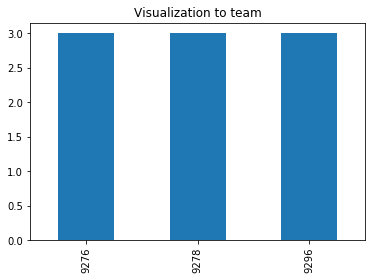

In [24]:
#We can see in the above dataframe that several features are not important as table booking, online delivery and so on. We now try to visualize the price range for the team to decide. 
visual_team['Price range'].plot(kind = 'bar', title = 'Visualization to team')

We can see in the above bar that the price range for the excellent rating is average i.e., 3. So, the final report goes as the final country to be Indonesia, final city to be Tangerang and despite of having other features like online booking and delivery, the team should focus on adjusting the price of the food to average. This will help flourish the Starbucks business franchise in Asia. 